## 기초데이터과학 (01분반) 

## Programming assignment 04

### 1. 미국의 아기 이름 데이터로 아래 문제에 맞게 코드를 작성하여 그래프를 그리세요.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터 생성
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

#### 1-1. 2004년의 남아 아기 이름 중 가장 인기 있는 상위 10개 이름을 막대 그래프로 나타내세요.

In [ ]:
# 'Year'가 2004이고 'Gender'가 'M'인 dataframe 구분하여 변수에 저장
import matplotlib.pyplot as plt
import pandas as pd
df
Year_04_Gen_M = df[(df['Year'] == 2004) & (df['Gender'] =='M')]
# 에러가 나타날 수가 있는 부분이 &와 and의 차이임
# 만약에 & 대신에 and를 사용하면 ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
# 이런 에러가 발생할 수도 있다.

# dataframe 출력
Year_04_Gen_M

# 'Count'를 가준으로 상위 10개 구분하여 변수에 저장
top_10_year_Gen = Year_04_Gen_M.nlargest(10,'Count')
# 보통은 df.head(10)이라는 것을 사용하는데... ~을 기준으로 변수에 저장하는 경우에는 nlargest 함수를 사용한다.

# figure size (10, 6)으로 설정
# matplotlib.pyplot.figure() 함수의 figsize 매개변수
plt.figure(figsize=(10, 6))

# x축은 'Name' y축은 'Count'로 'blue' color의 막대 그래프를 그리기
plt.bar(top_10_year_Gen['Name'],top_10_year_Gen['Count'],color='blue')
# title은 'Top 10 Male Baby Names in 2004'
plt.title('Top 10 Male Baby Names in 2004')
# xlabel과 ylabel ''Name'', ''Number of Babies''로 설정
plt.xlabel('Name')
plt.ylabel('Number of Babies')


# 그래프 출력
plt.show()




#### 1-2. 2004년과 2014년 가장 인기 있는 상위 10개 여아 아기 이름 비교

In [75]:
# # 'Gender'가 'F'이고  'Year'가 2004인 dataframe과 'Year'가 2014 dataframe을 'Count'를 가준으로 상위 10개 구분하여 변수에 저장
# Gen_F_Yr_04_14 = df[(df["Gender"] == "F") & (df["Year"]== 2004) | (df["Year"] == 2014)]
# Gen_F_Yr_04_14
# top_10_Gen_F_Yr_04_14=Gen_F_Yr_04_14.nlargest(10, "Count")
# # figure size (10, 6)으로 설정
# plt.figure(figsize=(10,6))

# # x축은 'Name' y축은 'Count'로 2004년 2014년 막대 그래프 2개 그리기, 투명도를 조정해서 변화량을 확인 
# # (투명도 조절은 matplotlib.pyplot.bar 함수의 alpha 매개변수)
# year_2004 = top_10_Gen_F_Yr_04_14[top_10_Gen_F_Yr_04_14['Year'] == 2004]
# year_2014 = top_10_Gen_F_Yr_04_14[top_10_Gen_F_Yr_04_14['Year'] == 2014]

# # Plotting the 2004 data
# plt.bar(year_2004['Name'], year_2004['Count'], alpha=0.7, label="2004")

# # Plotting the 2014 data
# plt.bar(year_2014['Name'], year_2014['Count'], alpha=0.7, label="2014")

# # title 설정
# plt.title('Top 10 Female Baby Names in 2004 and 2014')

# # xlabel과 ylabel 설정
# plt.xlabel('Name')
# plt.ylabel('Number of Babies')

# # x축 항목 45도 기울이기
# plt.xticks(rotation=45)

# # 범례 표시
# plt.legend()

# # 그래프 출력
# plt.tight_layout()
# plt.show()

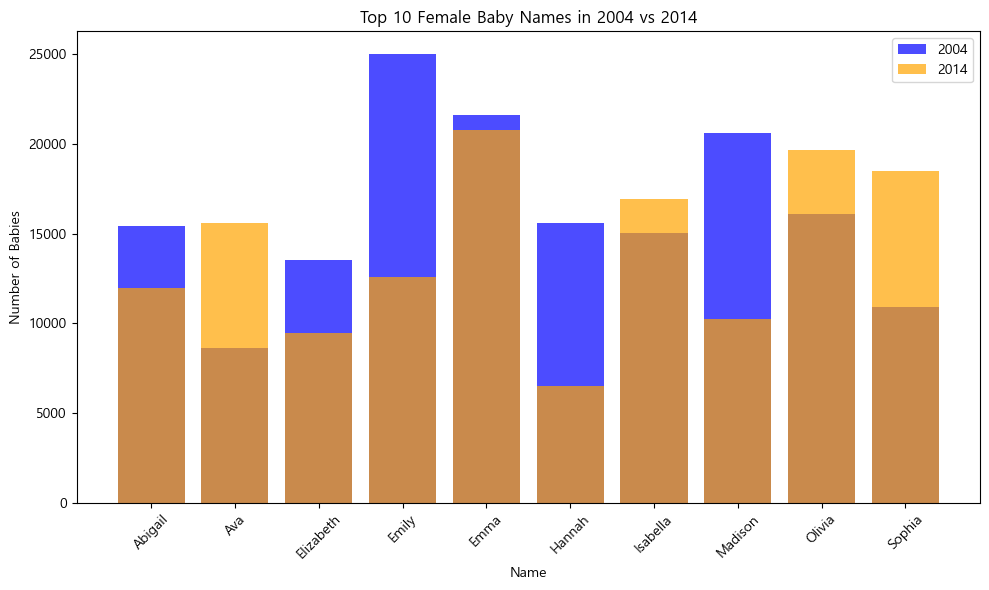

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing baby names data

# 'Gender'가 'F'이고 'Year'가 2004 또는 2014인 데이터프레임 추출
Gen_F_Yr_04_14 = df[(df["Gender"] == "F") & ((df["Year"] == 2004) | (df["Year"] == 2014))]

# 'Count' 기준으로 상위 10개 구분하여 변수에 저장
top_10_Gen_F_Yr_04_14 = Gen_F_Yr_04_14.groupby(['Name', 'Year']).sum().reset_index()


# 상위 10개 이름만 추출
top_10_names = top_10_Gen_F_Yr_04_14.groupby('Name')['Count'].sum().nlargest(10).index
top_10_Gen_F_Yr_04_14 = top_10_Gen_F_Yr_04_14[top_10_Gen_F_Yr_04_14['Name'].isin(top_10_names)]

# Separate data for the years 2004 and 2014
year_2004 = top_10_Gen_F_Yr_04_14[top_10_Gen_F_Yr_04_14['Year'] == 2004]
year_2014 = top_10_Gen_F_Yr_04_14[top_10_Gen_F_Yr_04_14['Year'] == 2014]

# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# x축은 'Name' y축은 'Count'로 2004년 2014년 막대 그래프 2개 그리기, 투명도를 조정해서 변화량을 확인 
plt.bar(year_2004['Name'], year_2004['Count'], color='blue', label='2004', alpha=0.7)
plt.bar(year_2014['Name'], year_2014['Count'], color='orange', label='2014', alpha=0.7)

# title 설정
plt.title('Top 10 Female Baby Names in 2004 vs 2014')

# xlabel과 ylabel 설정
plt.xlabel('Name')
plt.ylabel('Number of Babies')

# x축 항목 45도 기울이기
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


#### 1-3. 남아와 여아의 이름 수를 파이그래프를 그려 비교하세요.

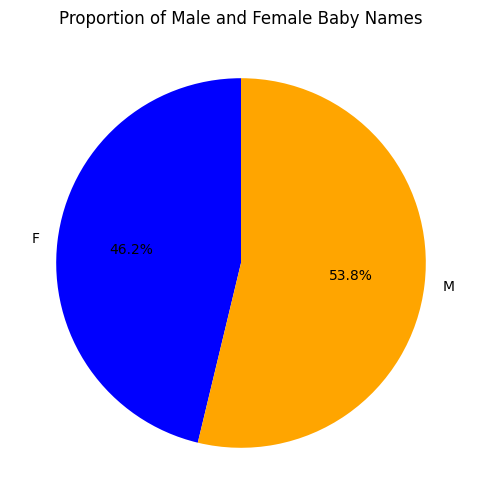

In [42]:

import matplotlib.pyplot as plt
import pandas as pd
# 'Gender'를 기준으로 'Count' 속성을 더해 성별 인구수 합을 새로운 변수에 저장
gender_population = df.groupby('Gender')['Count'].sum()

# figure size (10, 6)으로 설정
plt.figure(figsize=(10,6))

# 파이 차트로 그리기
plt.pie(gender_population, labels=gender_population.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])


# title은 'Proportion of Male and Female Baby Names'
plt.title('Proportion of Male and Female Baby Names')

# 그래프 출력
plt.show()


### 2. Chipotle 데이터로 아래 문제에 맞게 코드를 작성하여 그래프를 그리세요.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터 생성
chipotle_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(chipotle_url, sep = '\t')

#### 2-1. 히스토그램 그래프를 그려 메뉴 판매수 분포를 나타내세요.

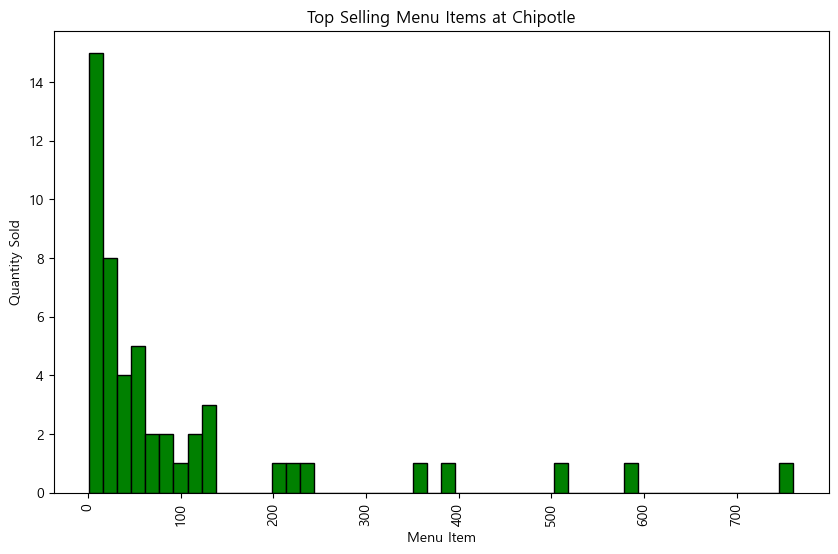

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

menu_cnt = df.groupby('item_name')['quantity'].sum()

# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# 데이터셋에 팔린 메뉴 수가 어떻게 분포하는지 히스토그램 그래프 그리기
# 'green' 색으로 edgecolor는 'black'으로 bins는 50
plt.hist(menu_cnt.values, bins=50, color='green', edgecolor='black') # 그래프의 색상은 skyblue, 막대 테두리 색상은 black

# 그래프 제목 및 레이블 설정
plt.title('Top Selling Menu Items at Chipotle')

# xlabel과 ylabel은 'Menu Item', 'Quantity Sold'로 설정
plt.xlabel('Menu Item')
plt.ylabel('Quantity Sold')



# x축 항목 90도 기울이기
plt.xticks(rotation=90)

# 그래프 보여주기
plt.show()

#### 2-2. 주문 id 'order_id' 별 평균 가격을 막대 그래프로 시각화하세요.

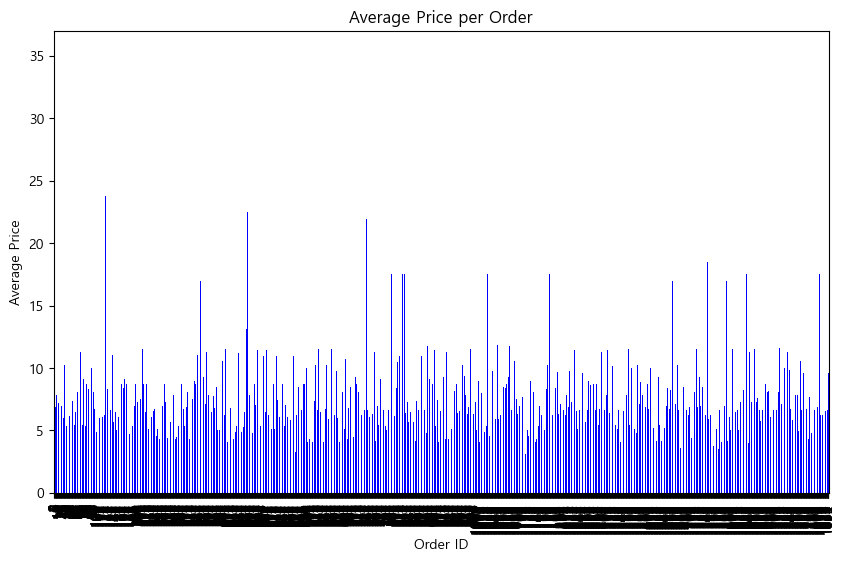

In [90]:
# 데이터셋의 'order_id'를 기준으로 'item_price'의 평균을 구해서 변수에 저장
# 'item_price'에는 '$'가 포함되어 있는 문자열 값이 저장되어 있으므로 숫자값 변환 과정이 있어야 함
# $를 먼저 없애고 그 다음에 숫자값을 변환해야 하면 된다.

# 'item_price'의 '$'를 제거하고 숫자(float)로 변환
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)

# 'order_id'를 기준으로 'item_price'의 평균을 구해서 변수에 저장
avg_price_per_order = df.groupby('order_id')['item_price'].mean()

# figure size (10, 6)으로 설정, bar 그래프 그리기
plt.figure(figsize=(10, 6))
avg_price_per_order.plot(kind='bar', color='blue')


# title은 'Average Price per Order로 설정
plt.title('Average Price per Order')

# xlabel과 ylabel은 'Order ID', 'Average Price'로 설정
plt.xlabel('Order ID')
plt.ylabel('Average Price')


# 그래프 출력
plt.show()


In [103]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 2-3. 상위든 하위든 10개 메뉴의 평균 가격을 선 그래프를 그려 비교하세요.

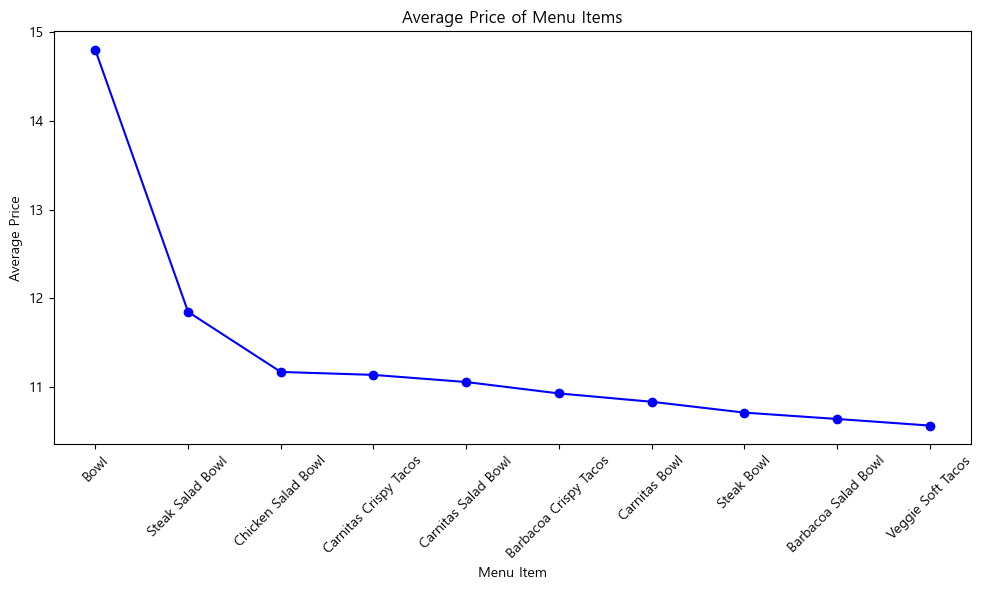

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋의 'item_name'를 기준으로 'item_price'의 평균을 구하고 정렬한뒤 상위 10개 메뉴를 변수에 저장
avg_price_per_item = df.groupby('item_name')['item_price'].mean().sort_values(ascending=False).head(10)

# 'item_price' 열이 문자열일 경우에만 '$'를 제거하고 숫자(float)로 변환
if df['item_price'].dtype == 'object':
    df['item_price'] = df['item_price'].str.replace('$', '').astype(float)

# figure size (10, 6)으로 설정, marker를 'o'로 설정하고 bar 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_item.index, avg_price_per_item.values, marker='o', linestyle='-', color='blue')

# title 설정
plt.title('Average Price of Menu Items')

# xlabel과 ylabel 설정
plt.xlabel('Menu Item')
plt.ylabel('Average Price')

# x축 항목 45도 기울이기
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()


### 3. 타이타닉 승객 정보 데이터로 아래 문제에 맞게 코드를 작성하여 그래프를 그리세요.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터 생성
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#### 3-1. 타이타닉 호의 생존자 수와 사망자 수를 막대그래프를 그려 비교하세요.

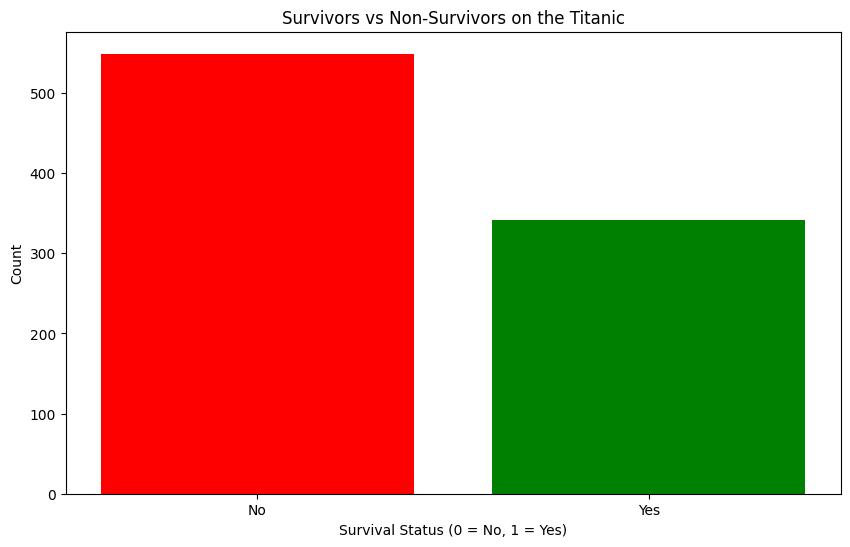

In [22]:
# 데이터의 'Survived' 속성의 0, 1 개수를 세서 생존자와 사망자의 수를 구하고 변수에 저장
# pandas.DataFrame.value_counts 활용, 다른 방법 사용 가능
import pandas as pd
import matplotlib.pyplot as plt

survival_counts = df['Survived'].value_counts()
# figure size (10, 6)으로 설정, 색을 사망자는 'red', 생존자는 'green'으로 설정하여 bar 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar([0, 1], survival_counts, color=['red', 'green'])


# title은 'Survivors vs Non-Survivors on the Titanic'로 설정
plt.title('Survivors vs Non-Survivors on the Titanic')

# xlabel과 ylabel은 'Survival Status (0 = No, 1 = Yes)', 'Count'로 설정
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')


# x축 항목 이름을 [0, 1]에서 ['No', 'Yes']로 변경
plt.xticks([0, 1], ['No', 'Yes'])

# 그래프 출력
plt.show()


#### 3-2. 나이에 따른 생존 비율 변화를 선 그래프로 나타내세요.

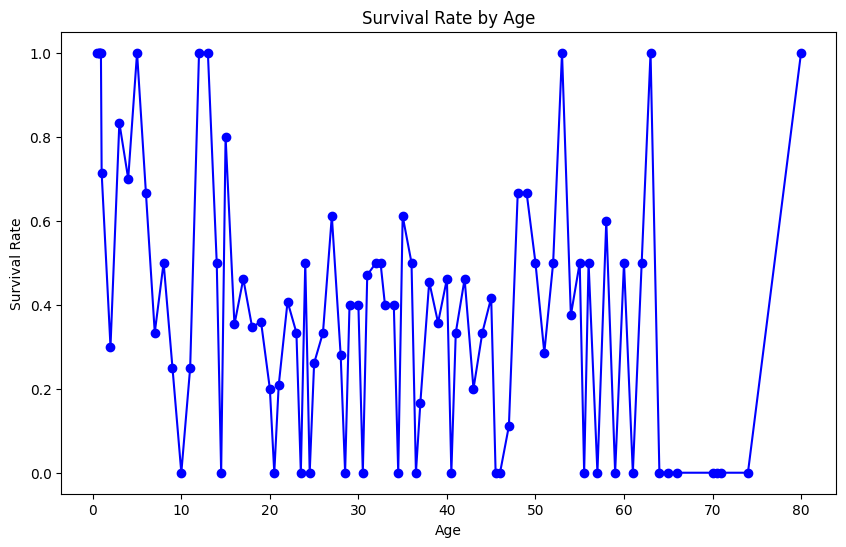

In [23]:
# 'Age'를 기준으로 'Survived'의 평균을 계산하여 변수에 저장
# 0과 1로 구성된 'Survived'의 평균은 생존 비율을 나타냄
import pandas as pd
import matplotlib.pyplot as plt

survival_rate_by_age = df.groupby('Age')['Survived'].mean()
# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# marker를 'o'로 설정하여 선 그래프 그리기
plt.plot(survival_rate_by_age.index, survival_rate_by_age.values, marker='o', linestyle='-', color='blue')


# title은 'Survival Rate by Age'로 설정
plt.title('Survival Rate by Age')

# xlabel과 ylabel은 'Age', 'Survival Rate'로 설정
plt.xlabel('Age')
plt.ylabel('Survival Rate')


# 그래프 출력
plt.show()


### 4. 와인 품질 데이터로 아래 문제에 맞게 코드를 작성하여 그래프를 그리세요.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 데이터 생성
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

#### 4-1. 히스토그램 그래프를 그려 와인 품질 분포를 나타내세요.

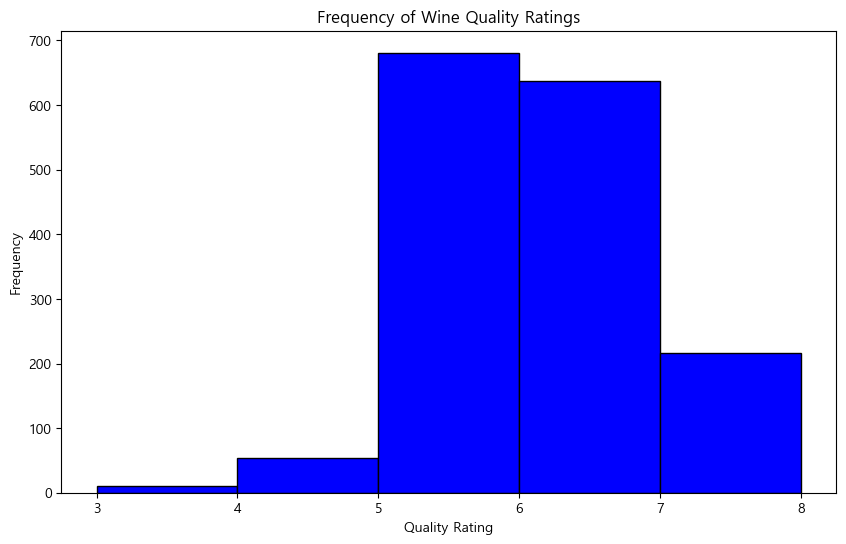

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# 데이터셋에 와인 퀄리티가 어떻게 분포하는지 히스토그램 그래프 그리기
# bins 는 5

plt.hist(df['quality'], bins=5, color='blue', edgecolor='black')

# title은 'Frequency of Wine Quality Ratings'로 설정
plt.title('Frequency of Wine Quality Ratings')

# xlabel과 ylabel은 'Quality Rating', 'Frequency'로 설정
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')



# 그래프 출력
plt.show()



#### 4-2. 알코올 도수에 따른 평균 품질 점수를 상자 그림으로 그려보세요.

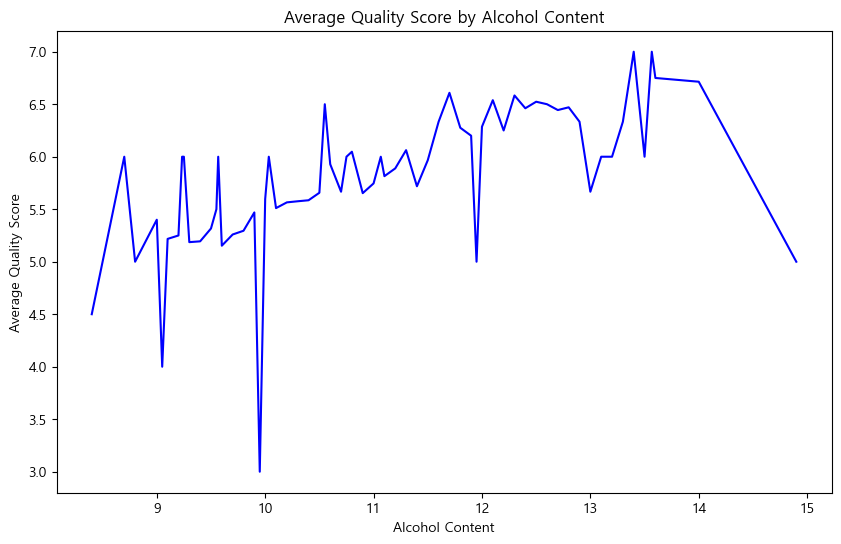

In [112]:

import pandas as pd
import matplotlib.pyplot as plt
# 'alcohol' 속성을 기준으로 'quality'의 평균을 계산하여 변수에 저장
avg_quality_by_alcohol = df.groupby('alcohol')['quality'].mean()

# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(avg_quality_by_alcohol.index, avg_quality_by_alcohol.values, color='blue')

# title은 'Average Quality Score by Alcohol Content'로 설정
plt.title('Average Quality Score by Alcohol Content')

# xlabel과 ylabel은 'Alcohol Content', 'Average Quality Score'로 설정
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Score')

# 그래프 출력
plt.show()



#### 4-3. 품질에 따른 산도 분포를 상자 그림(box plot)으로 표현하세요.

C:\Users\didsu\AppData\Local\Temp\ipykernel_24020\749597503.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(fixed_acidity_by_quality, labels=[3, 4, 5, 6, 7, 8])


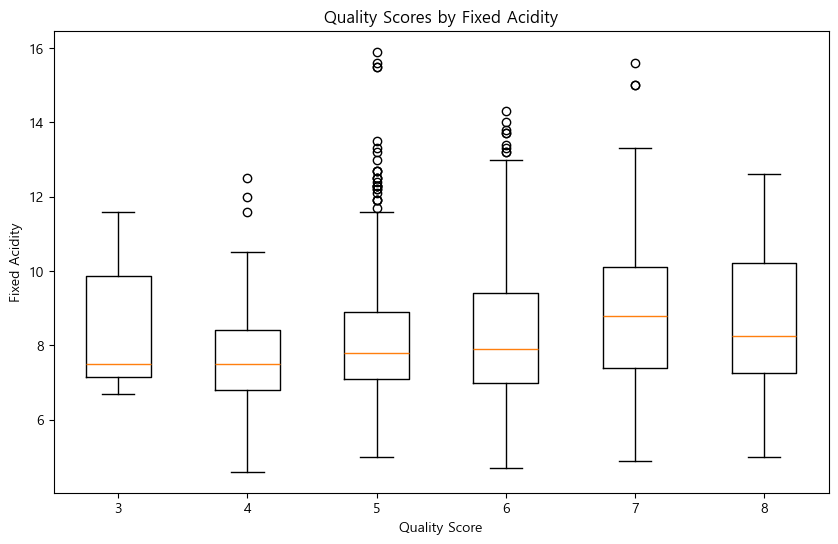

In [113]:
# 각 품질 점수 (quality(3, 4, 5, 6, 7, 8)) 별로 나누어 산도 분포 ('fixed acidity') 저장
# 2차원 배열 형태로 만들 것 ex) [[1, 2, 3], [1.1, 2.2, 3.3], [5, 6, 7, 8], [6.5], [3.2, 4.5], [8]]
import pandas as pd
import matplotlib.pyplot as plt



fixed_acidity_by_quality = [
    df[df['quality'] == 3]['fixed acidity'].tolist(),
    df[df['quality'] == 4]['fixed acidity'].tolist(),
    df[df['quality'] == 5]['fixed acidity'].tolist(),
    df[df['quality'] == 6]['fixed acidity'].tolist(),
    df[df['quality'] == 7]['fixed acidity'].tolist(),
    df[df['quality'] == 8]['fixed acidity'].tolist()
]




# figure size (10, 6)으로 설정
plt.figure(figsize=(10, 6))

# x축 label을 3, 4, 5, 6, 7, 8로 설정하여 상자 그림(box plot) 그리기
plt.boxplot(fixed_acidity_by_quality, labels=[3, 4, 5, 6, 7, 8])


# title은 'Quality Scores by Fixed Acidity'로 설정
plt.title('Quality Scores by Fixed Acidity')


# xlabel과 ylabel은 ('Quality Score', 'Fixed Acidity'로 설정
plt.xlabel('Quality Score')
plt.ylabel('Fixed Acidity')



# 그래프 출력
plt.show()


####